In [3]:
!pip install nltk gensim wordcloud transformers -q

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import TSNE

from gensim.models import Word2Vec

from wordcloud import WordCloud

import torch
from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer,
    logging as hf_logging
)

hf_logging.set_verbosity_warning()

nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('punkt_tab')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 18.6 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
song_1_title = "Linkin Park - Numb"
song_2_title = "Coldplay - Yellow"
song_3_title = "Adele - Hello"

song_1_lyrics = """
I'm tired of being what you want me to be
Feeling so faithless, lost under the surface
Don't know what you're expecting of me
Put under the pressure of walking in your shoes
Every step that I take is another mistake to you
(Caught in the undertow, just caught in the undertow)
I've become so numb, I can't feel you there
Become so tired, so much more aware
I'm becoming this, all I want to do
Is be more like me and be less like you
Can't you see that you're smothering me?
Holding too tightly, afraid to lose control
'Cause everything that you thought I would be
Has fallen apart right in front of you
Every step that I take is another mistake to you
(Caught in the undertow, just caught in the undertow)
And every second I waste is more than I can take
I've become so numb, I can't feel you there
Become so tired, so much more aware
I'm becoming this, all I want to do
Is be more like me and be less like you
And I know
I may end up failing too
But I know
You were just like me, with someone disappointed in you
I've become so numb, I can't feel you there
Become so tired, so much more aware
I'm becoming this, all I want to do
Is be more like me and be less like you
I've become so numb, I can't feel you there
I'm tired of being what you want me to be
I've become so numb, I can't feel you there
I'm tired of being what you want me to be
""".strip()

song_2_lyrics = """
Look at the stars
Look how they shine for you
And everything you do
Yeah, they were all yellow
I came along
I wrote a song for you
And all the things you do
And it was called, "Yellow"
So then I took my turn
Oh, what a thing to have done
And it was all yellow
Your skin, oh yeah, your skin, and bones
Turn into something beautiful
And you know, you know I love you so
You know I love you so
I swam across
I jumped across for you
Oh, what a thing to do
'Cause you were all yellow
I drew a line
I drew a line for you
Oh, what a thing to do
And it was all yellow
And your skin, oh yeah, your skin, and bones
Turn into something beautiful
And you know, for you, I'd bleed myself dry
For you, I'd bleed myself dry
It's true
Look how they shine for you
Look how they shine for you
Look how they shine for-
Look how they shine for you
Look how they shine for you
Look how they shine
Look at the stars
Look how they shine for you
And all the things that you do
""".strip()

song_3_lyrics = """
Hello, it's me
I was wondering if after all these years you'd like to meet
To go over everything
They say that time's supposed to heal ya, but I ain't done much healing
Hello, can you hear me?
I'm in California dreaming about who we used to be
When we were younger and free
I've forgotten how it felt before the world fell at our feet
There's such a difference between us
And a million miles
Hello from the other side
I must've called a thousand times
To tell you I'm sorry for everything that I've done
But when I call, you never seem to be home
Hello from the outside
At least I can say that I've tried
To tell you I'm sorry for breaking your heart
But it don't matter, it clearly doesn't tear you apart anymore
Hello, how are you?
It's so typical of me to talk about myself, I'm sorry
I hope that you're well
Did you ever make it out of that town where nothing ever happened?
It's no secret that the both of us
Are running out of time
So hello from the other side (other side)
I must've called a thousand times (thousand times)
To tell you I'm sorry for everything that I've done
But when I call, you never seem to be home
Hello from the outside (outside)
At least I can say that I've tried (I've tried)
To tell you I'm sorry for breaking your heart
But it don't matter, it clearly doesn't tear you apart anymore
Ooh (lows, lows, lows, lows), anymore
(Highs, highs, highs, highs)
Ooh (lows, lows, lows, lows), anymore
(Highs, highs, highs, highs)
Ooh (lows, lows, lows, lows), anymore
(Highs, highs, highs, highs)
Anymore (lows, lows, lows, lows)
Hello from the other side (other side)
I must've called a thousand times (thousand times)
To tell you I'm sorry for everything that I've done
But when I call, you never seem to be home
Hello from the outside (outside)
At least I can say that I've tried (I've tried)
To tell you I'm sorry for breaking your heart
But it don't matter, it clearly doesn't tear you apart anymore
""".strip()

songs = [
    {"title": song_1_title, "lyrics": song_1_lyrics},
    {"title": song_2_title, "lyrics": song_2_lyrics},
    {"title": song_3_title, "lyrics": song_3_lyrics},
]

pd.DataFrame(songs)



,title,lyrics
0,Linkin Park - Numb,"I'm tired of being what you want me to be\nFeeling so faithless, lost under the surface\nDon't know what you're expecting of me\nPut under the pressure of walking in your shoes\nEvery step that I take is another mistake to you\n(Caught in the undertow, just caught in the undertow)\nI've become so numb, I can't feel you there\nBecome so tired, so much more aware\nI'm becoming this, all I want to do\nIs be more like me and be less like you\nCan't you see that you're smothering me?\nHolding too tightly, afraid to lose control\n'Cause everything that you thought I would be\nHas fallen apart right in front of you\nEvery step that I take is another mistake to you\n(Caught in the undertow, just caught in the undertow)\nAnd every second I waste is more than I can take\nI've become so numb, I can't feel you there\nBecome so tired, so much more aware\nI'm becoming this, all I want to do\nIs be more like me and be less like you\nAnd I know\nI may end up failing too\nBut I know\nYou were just like me, with someone disappointed in you\nI've become so numb, I can't feel you there\nBecome so tired, so much more aware\nI'm becoming this, all I want to do\nIs be more like me and be less like you\nI've become so numb, I can't feel you there\nI'm tired of being what you want me to be\nI've become so numb, I can't feel you there\nI'm tired of being what you want me to be"
1,Coldplay - Yellow,"Look at the stars\nLook how they shine for you\nAnd everything you do\nYeah, they were all yellow\nI came along\nI wrote a song for you\nAnd all the things you do\nAnd it was called, ""Yellow""\nSo then I took my turn\nOh, what a thing to have done\nAnd it was all yellow\nYour skin, oh yeah, your skin, and bones\nTurn into something beautiful\nAnd you know, you know I love you so\nYou know I love you so\nI swam across\nI jumped across for you\nOh, what a thing to do\n'Cause you were all yellow\nI drew a line\nI drew a line for you\nOh, what a thing to do\nAnd it was all yellow\nAnd your skin, oh yeah, your skin, and bones\nTurn into something beautiful\nAnd you know, for you, I'd bleed myself dry\nFor you, I'd bleed myself dry\nIt's true\nLook how they shine for you\nLook how they shine for you\nLook how they shine for-\nLook how they shine for you\nLook how they shine for you\nLook how they shine\nLook at the stars\nLook how they shine for you\nAnd all the things that you do"
2,Adele - Hello,"Hello, it's me\nI was wondering if after all these years you'd like to meet\nTo go over everything\nThey say that time's supposed to heal ya, but I ain't done much healing\nHello, can you hear me?\nI'm in California dreaming about who we used to be\nWhen we were younger and free\nI've forgotten how it felt before the world fell at our feet\nThere's such a difference between us\nAnd a million miles\nHello from the other side\nI must've called a thousand times\nTo tell you I'm sorry for everything that I've done\nBut when I call, you never seem to be home\nHello from the outside\nAt least I can say that I've tried\nTo tell you I'm sorry for breaking your heart\nBut it don't matter, it clearly doesn't tear you apart anymore\nHello, how are you?\nIt's so typical of me to talk about myself, I'm sorry\nI hope that you're well\nDid you ever make it out of that town where nothing ever happened?\nIt's no secret that the both of us\nAre running out of time\nSo hello from the other side (other side)\nI must've called a thousand times (thousand times)\nTo tell you I'm sorry for everything that I've done\nBut when I call, you never seem to be home\nHello from the outside (outside)\nAt least I can say that I've tried (I've tried)\nTo tell you I'm sorry for breaking your heart\nBut it don't matter, it clearly doesn't tear you apart anymore\nOoh (lows, lows, lows, lows), anymore\n(Highs, highs, highs, highs)\nOoh (lows, lows, lows, lows), anymore\n(Highs, highs, highs, highs)\nOoh (lows, lows, lows, lows), anymore\n(Highs, highs, highs, highs)\nAnym

In [6]:
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()

    tokens = nltk.word_tokenize(text)

    tokens = [t for t in tokens if t not in stop_words]

    lemmas = [lemmatizer.lemmatize(t) for t in tokens]

    cleaned_text = " ".join(lemmas)

    return {
        "cleaned_text": cleaned_text,
        "tokens": lemmas,
    }

processed_songs = []
for s in songs:
    p = preprocess_text(s["lyrics"])
    processed_songs.append({
        "title": s["title"],
        "original_text": s["lyrics"],
        "cleaned_text": p["cleaned_text"],
        "tokens": p["tokens"],
    })

df_songs = pd.DataFrame(processed_songs)
df_songs


,title,original_text,cleaned_text,tokens
0,Linkin Park - Numb,"I'm tired of being what you want me to be\nFeeling so faithless, lost under the surface\nDon't know what you're expecting of me\nPut under the pressure of walking in your shoes\nEvery step that I take is another mistake to you\n(Caught in the undertow, just caught in the undertow)\nI've become so numb, I can't feel you there\nBecome so tired, so much more aware\nI'm becoming this, all I want to do\nIs be more like me and be less like you\nCan't you see that you're smothering me?\nHolding too tightly, afraid to lose control\n'Cause everything that you thought I would be\nHas fallen apart right in front of you\nEvery step that I take is another mistake to you\n(Caught in the undertow, just caught in the undertow)\nAnd every second I waste is more than I can take\nI've become so numb, I can't feel you there\nBecome so tired, so much more aware\nI'm becoming this, all I want to do\nIs be more like me and be less like you\nAnd I know\nI may end up failing too\nBut I know\nYou were just like me, with someone disappointed in you\nI've become so numb, I can't feel you there\nBecome so tired, so much more aware\nI'm becoming this, all I want to do\nIs be more like me and be less like you\nI've become so numb, I can't feel you there\nI'm tired of being what you want me to be\nI've become so numb, I can't feel you there\nI'm tired of being what you want me to be",tired want feeling faithless lost surface know expecting put pressure walking shoe every step take another mistake caught undertow caught undertow become numb feel become tired much aware becoming want like less like see smothering holding tightly afraid lose control cause everything thought would fallen apart right front every step take another mistake caught undertow caught undertow every second waste take become numb feel become tired much aware becoming want like less like know may end failing know like someone disappointed become numb feel become tired much aware becoming want like less like become numb feel tired want become numb feel tired want,"[tired, want, feeling, faithless, lost, surface, know, expecting, put, pressure, walking, shoe, every, step, take, another, mistake, caught, undertow, caught, undertow, become, numb, feel, become, tired, much, aware, becoming, want, like, less, like, see, smothering, holding, tightly, afraid, lose, control, cause, everything, thought, would, fallen, apart, right, front, every, step, take, another, mistake, caught, undertow, caught, undertow, every, second, waste, take, become, numb, feel, become, tired, much, aware, becoming, want, like, less, like, know, may, end, failing, know, like, someone, disappointed, become, numb, feel, become, tired, much, aware, becoming, want, like, less, like, become, numb, feel, tired, want, become, numb, ...]"
1,Coldplay - Yellow,"Look at the stars\nLook how they shine for you\nAnd everything you do\nYeah, they were all yellow\nI came along\nI wrote a song for you\nAnd all the things you do\nAnd it was called, ""Yellow""\nSo then I took my turn\nOh, what a thing to have done\nAnd it was all yellow\nYour skin, oh yeah, your skin, and bones\nTurn into something beautiful\nAnd you know, you know I love you so\nYou know I love you so\nI swam across\nI jumped across for you\nOh, what a thing to do\n'Cause you were all yellow\nI drew a line\nI drew a line for you\nOh, what a thing to do\nAnd it was all yellow\nAnd your skin, oh yeah, your skin, and bones\nTurn into something beautiful\nAnd you know, for you, I'd bleed myself dry\nFor you, I'd bleed myself dry\nIt's true\nLook how they shine for you\nLook how they shine for you\nLook how they shine for-\nLook how they shine for you\nLook how they shine for you\nLook how they shine\nLook at the stars\nLook how they shine for you\nAnd all the things that you do",look star look shine everything yeah yellow came along wrote song thing called yellow took turn oh thing done yellow skin oh yeah skin bo

In [7]:
def song_stats(row):
    tokens = row["tokens"]
    total = len(tokens)
    unique = len(set(tokens))
    top10 = Counter(tokens).most_common(10)
    return pd.Series({"total_tokens": total, "unique_tokens": unique, "top10": top10})

stats = df_songs.apply(song_stats, axis=1)
stats["title"] = df_songs["title"]
stats


,total_tokens,unique_tokens,top10,title
0,103,49,"[(become, 8), (like, 7), (tired, 6), (want, 6), (numb, 5), (feel, 5), (caught, 4), (undertow, 4), (know, 3), (every, 3)]",Linkin Park - Numb
1,79,31,"[(look, 10), (shine, 8), (yellow, 5), (thing, 5), (oh, 5), (skin, 4), (know, 4), (yeah, 3), (turn, 3), (star, 2)]",Coldplay - Yellow
2,176,64,"[(low, 16), (high, 12), (hello, 9), (time, 7), (sorry, 7), (anymore, 7), (tell, 6), (side, 5), (thousand, 5), (outside, 5)]",Adele - Hello


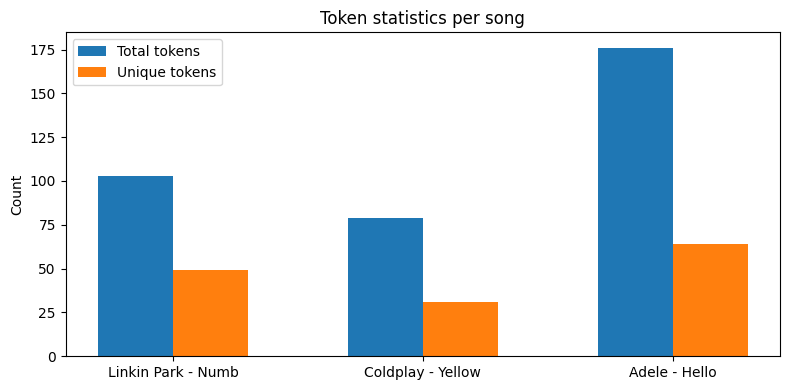

In [8]:
plt.figure(figsize=(8,4))
x = np.arange(len(df_songs))
plt.bar(x - 0.15, stats["total_tokens"], width=0.3, label="Total tokens")
plt.bar(x + 0.15, stats["unique_tokens"], width=0.3, label="Unique tokens")
plt.xticks(x, df_songs["title"])
plt.ylabel("Count")
plt.title("Token statistics per song")
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df_songs["cleaned_text"])
tfidf_matrix.shape


(3, 134)

In [10]:
tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    index=df_songs["title"],
    columns=tfidf_vectorizer.get_feature_names_out()
)

top_tfidf_per_song = {}

for title in tfidf_df.index:
    row = tfidf_df.loc[title]
    top10 = row.sort_values(ascending=False).head(10)
    top_tfidf_per_song[title] = top10

top_tfidf_per_song


{'Linkin Park - Numb': become      0.431797
 want        0.323848
 tired       0.323848
 like        0.287344
 numb        0.269873
 feel        0.269873
 undertow    0.215898
 caught      0.215898
 every       0.161924
 aware       0.161924
 Name: Linkin Park - Numb, dtype: float64,
 'Coldplay - Yellow': look         0.548542
 shine        0.438833
 yellow       0.274271
 oh           0.274271
 thing        0.274271
 skin         0.219417
 know         0.166872
 yeah         0.164563
 turn         0.164563
 something    0.109708
 Name: Coldplay - Yellow, dtype: float64,
 'Adele - Hello': low         0.518998
 high        0.389249
 hello       0.291937
 sorry       0.227062
 anymore     0.227062
 time        0.227062
 tell        0.194624
 tried       0.162187
 outside     0.162187
 thousand    0.162187
 Name: Adele - Hello, dtype: float64}

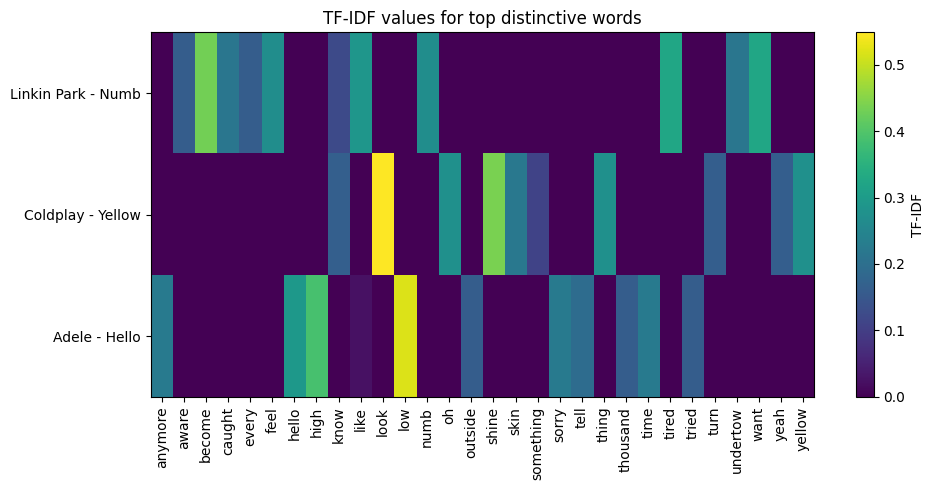

In [11]:
top_words_all = set()
for title, top10 in top_tfidf_per_song.items():
    top_words_all.update(top10.index)

top_words_all = sorted(list(top_words_all))

tfidf_top = tfidf_df[top_words_all]

plt.figure(figsize=(10,5))
plt.imshow(tfidf_top, aspect="auto")
plt.colorbar(label="TF-IDF")
plt.yticks(np.arange(len(tfidf_top.index)), tfidf_top.index)
plt.xticks(np.arange(len(top_words_all)), top_words_all, rotation=90)
plt.title("TF-IDF values for top distinctive words")
plt.tight_layout()
plt.show()


**Conclusion:**  
TF-IDF highlights the most distinctive words for each song: emotional conflict terms like *“numb”, “tired”, "aware"* appear only in Linkin Park – Numb, poetic vocabulary like *“yellow”, “shine”, “skin”* uniquely describes Coldplay – Yellow, while *“hello”, “sorry”, "high", "low"* stand out in Adele – Hello. This confirms that TF-IDF effectively extracts song-specific vocabulary and separates the lyrical themes across the three texts.


In [12]:
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df_songs["cleaned_text"])
count_df = pd.DataFrame(
    count_matrix.toarray(),
    index=df_songs["title"],
    columns=count_vectorizer.get_feature_names_out()
)
count_df.shape


(3, 134)

In [13]:
top_count_per_song = {}

for title in count_df.index:
    row = count_df.loc[title]
    top10 = row.sort_values(ascending=False).head(10)
    top_count_per_song[title] = top10

top_count_per_song


{'Linkin Park - Numb': become      8
 like        7
 want        6
 tired       6
 numb        5
 feel        5
 undertow    4
 caught      4
 less        3
 aware       3
 Name: Linkin Park - Numb, dtype: int64,
 'Coldplay - Yellow': look         10
 shine         8
 yellow        5
 oh            5
 thing         5
 know          4
 skin          4
 yeah          3
 turn          3
 something     2
 Name: Coldplay - Yellow, dtype: int64,
 'Adele - Hello': low         16
 high        12
 hello        9
 sorry        7
 anymore      7
 time         7
 tell         6
 tried        5
 outside      5
 thousand     5
 Name: Adele - Hello, dtype: int64}

In [14]:
tokens = df_songs["tokens"].tolist()

w2v_model = Word2Vec(
    sentences=tokens,
    vector_size=50,
    window=5,
    min_count=1,
    workers=2,
    sg=1,
    epochs=100
)

def song_embedding(tokens, model):
    vectors = []
    for t in tokens:
        if t in model.wv:
            vectors.append(model.wv[t])
    if not vectors:
        return np.zeros(model.vector_size)
    return np.mean(vectors, axis=0)

song_embeddings = np.vstack([
    song_embedding(tokens, w2v_model)
    for tokens in df_songs["tokens"]
])

song_embeddings.shape


(3, 50)

In [15]:
import time
import psutil
import os

In [16]:
times = {}

start = time.time()
count_vectorizer = CountVectorizer()
count_mat = count_vectorizer.fit_transform(df_songs["cleaned_text"])
times["CountVectorizer"] = time.time() - start

start = time.time()
tfidf_vectorizer = TfidfVectorizer()
tfidf_mat = tfidf_vectorizer.fit_transform(df_songs["cleaned_text"])
times["TF-IDF"] = time.time() - start

start = time.time()
w2v_model = Word2Vec(
    sentences=df_songs["tokens"].tolist(),
    vector_size=50,
    window=5,
    min_count=1,
    workers=2,
    epochs=100,
    sg=1
)
w2v_embeds = np.vstack([
    song_embedding(tokens, w2v_model)
    for tokens in df_songs["tokens"]
])
times["Word2Vec"] = time.time() - start

times


{'CountVectorizer': 0.0017199516296386719,
 'TF-IDF': 0.008597850799560547,
 'Word2Vec': 0.5051484107971191}

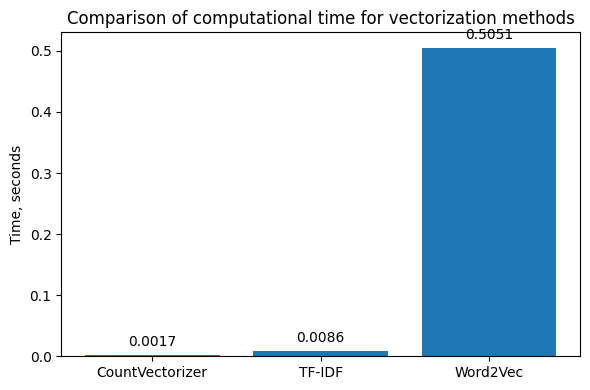

In [17]:
plt.figure(figsize=(6,4))

methods = list(times.keys())
values = [times[m] for m in methods]

plt.bar(methods, values)
plt.ylabel("Time, seconds")
plt.title("Comparison of computational time for vectorization methods")

for i, v in enumerate(values):
    plt.text(i, v + max(values)*0.02, f"{v:.4f}", ha="center", va="bottom")

plt.tight_layout()
plt.show()


### Computational complexity

The performance comparison clearly shows that CountVectorizer and TF-IDF are significantly faster than Word2Vec on the same text data. Both CountVectorizer and TF-IDF operate in a single pass through the corpus and create matrices directly from the tokenized text, resulting in execution time measured in fractions of a second.

Word2Vec, in contrast, requires iterative training of a model. Even on just three songs training takes noticeably longer and the performance gap grows drastically with real world datasets. This increased time cost is the direct consequence of optimization across multiple epochs and the need to update vectors for all tokens.



### Representation Quality

CountVectorizer provides only raw frequency statistics. It treats all words equally, so context and meaning are lost. As a result, two songs with completely different themes may appear similar if they share frequently used terms.

TF-IDF improves the representational quality by downweighting common words and emphasizing unique terms. In our results, each song showed a clear set of distinctive keywords with high TF-IDF values which accurately reflect the songs topics and emotional focus. This makes TF-IDF more helpful in distinguishing between texts than raw counts.

Word2Vec achieves the highest semantic expressiveness by representing words in a continuous vector space, where proximity reflects contextual similarity. Even though we only have three songs, the resulting embeddings still provide meaningful dense representations that can generalize better when comparing songs. On a larger dataset Word2Vec would offer a significant advantage in capturing linguistic structure and deeper relationships between expressions.


### Interpretability


CountVectorizer and TF-IDF are fully interpretable approaches: every vector dimension corresponds to a specific word. We can look directly at the weights and identify meaningful tokens, such as the emotional vocabulary in “Numb” or the imagery terms in “Yellow”. This transparency is important when the goal is purely analytical.

Word2Vec, however, creates dense embeddings where each dimension is not explicitly linked to a linguistic feature. Although these vectors are powerful for capturing semantic meaning, they become less interpretable. We can compute distances between song vectors and derive similarity, but we cannot assign readable meaning to individual components.


In [18]:
all_tokens = [t for tokens in df_songs["tokens"] for t in tokens]
top10_global = Counter(all_tokens).most_common(10)
top10_global


[('low', 16),
 ('high', 12),
 ('look', 10),
 ('hello', 9),
 ('become', 8),
 ('like', 8),
 ('shine', 8),
 ('know', 7),
 ('time', 7),
 ('sorry', 7)]

In [19]:
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = bigram_vectorizer.fit_transform(df_songs["cleaned_text"])
bigram_counts = np.asarray(bigram_matrix.sum(axis=0)).flatten()
bigram_vocab = np.array(bigram_vectorizer.get_feature_names_out())

bigram_freq = pd.DataFrame({
    "bigram": bigram_vocab,
    "count": bigram_counts
}).sort_values(by="count", ascending=False)

bigram_freq.head(10)


,bigram,count
102,low low,12
72,high high,9
94,look shine,8
132,shine look,6
155,tell sorry,6
13,become numb,5
115,numb feel,5
161,thousand time,5
24,caught undertow,4
27,clearly tear,3


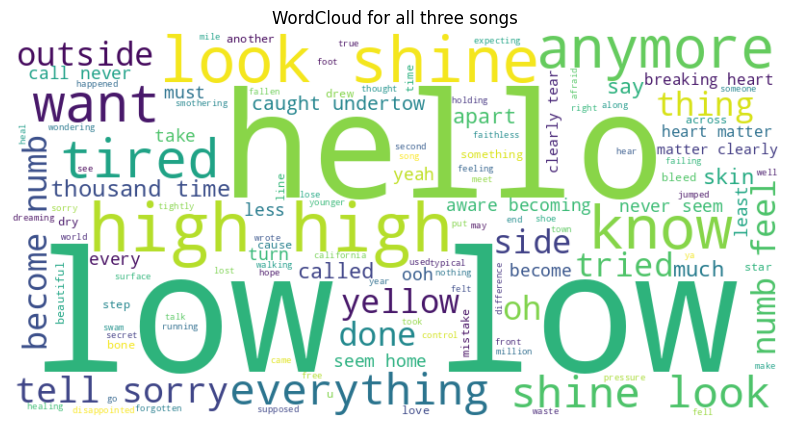

In [20]:
combined_text = " ".join(df_songs["cleaned_text"])

wordcloud = WordCloud(width=800, height=400, background_color="white").generate(combined_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud for all three songs")
plt.show()


**Conclusion:**  
The frequency and WordCloud analysis show clear thematic differences between the songs:
“Numb” focuses on emotional struggle, “Yellow” emphasizes visual/metaphorical imagery and “Hello” highlights communication and regret. The results confirm that statistical text analysis successfully extracts distinctive vocabulary and prepares the data well for vectorization techniques.


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
df = pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
df.head()


,review,sentiment
0,"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.",positive
1,"A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only ""has got all the polari"" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.",positive
2,"I thought this was a wonderful way to spend time on a too hot summer weekend, sitting in the air conditioned theater and watching a light-hearted comedy. The plot is simplistic, but the dialogue is witty and the characters are likable (even the well bread suspected serial killer). While some may be disappointed when they realize this is not Match Point 2: Risk Addiction, I thought it was proof that Woody Allen is still fully in control of the style many of us have grown to love.<br /><br />This was the most I'd laughed at one of Woody's comedies in years (dare I say a decade?). While I've never been impressed with Scarlet Johanson, in this she managed to tone down her ""sexy"" image and jumped right into a average, but spirited young woman.<br /><br />This may not be the crown jewel of his career, but it was wittier than ""Devil Wears Prada"" and more interesting than ""Superman"" a great comedy to go see with friends.",positive
3,"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zom

In [23]:
df.sentiment.value_counts()


,count
sentiment,
positive,25000
negative,25000


In [24]:
df["label"] = df["sentiment"].map({"negative": 0, "positive": 1})


In [25]:
train_texts, test_texts, train_labels, test_labels = train_test_split(
    df["review"].values,
    df["label"].values,
    test_size=0.2,
    random_state=42,
    stratify=df["label"].values
)


In [26]:
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
MAX_LEN = 128

class IMDbDataset(Dataset):
    def __init__(self, texts, labels):
        self.texts = list(texts)
        self.labels = list(labels)

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        enc = tokenizer(
            str(self.texts[idx]),
            truncation=True,
            padding="max_length",
            max_length=MAX_LEN,
            return_tensors="pt"
        )
        return {
            "input_ids": enc["input_ids"].squeeze(),
            "attention_mask": enc["attention_mask"].squeeze(),
            "labels": torch.tensor(self.labels[idx], dtype=torch.long)
        }

train_dataset = IMDbDataset(train_texts, train_labels)
test_dataset = IMDbDataset(test_texts, test_labels)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [27]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=2
).to(device)


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [28]:
import os
os.environ["WANDB_DISABLED"] = "true"


In [29]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

batch_size = 16

training_args = TrainingArguments(
    output_dir="./bert_imdb_results",
    num_train_epochs=2,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_steps=100,
    logging_dir="./logs"
)

trainer = Trainer(
    model=model,
    args=training_args,
    compute_metrics=compute_metrics,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    tokenizer=tokenizer
)

trainer.train()


Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
/tmp/ipython-input-3088077409.py:21: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Step,Training Loss
100,0.560800
200,0.370500
300,0.352800
400,0.317400
500,0.334700
600,0.333400
700,0.318200
800,0.332800
900,0.322500
1000,0.312500


TrainOutput(global_step=5000, training_loss=0.2472158582687378, metrics={'train_runtime': 1900.1848, 'train_samples_per_second': 42.101, 'train_steps_per_second': 2.631, 'total_flos': 5262221107200000.0, 'train_loss': 0.2472158582687378, 'epoch': 2.0})

In [30]:
results = trainer.evaluate()
results


{'eval_loss': 0.309588223695755,
 'eval_accuracy': 0.8996,
 'eval_precision': 0.8926886792452831,
 'eval_recall': 0.9084,
 'eval_f1': 0.9004758128469469,
 'eval_runtime': 77.0529,
 'eval_samples_per_second': 129.781,
 'eval_steps_per_second': 8.111,
 'epoch': 2.0}

In [31]:
preds_output = trainer.predict(test_dataset)
preds = preds_output.predictions.argmax(axis=1)

print("Accuracy:", accuracy_score(test_labels, preds))
print(classification_report(test_labels, preds, target_names=["negative", "positive"]))


Accuracy: 0.8996
              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      5000
    positive       0.89      0.91      0.90      5000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [32]:
def predict_sentiment(text):
    model.eval()
    with torch.no_grad():
        enc = tokenizer(
            text,
            return_tensors="pt",
            truncation=True,
            padding="max_length",
            max_length=MAX_LEN
        )
        enc = {k: v.to(device) for k, v in enc.items()}
        output = model(**enc)
        pred = output.logits.argmax(dim=1).item()
        return "positive" if pred == 1 else "negative"

print(predict_sentiment("This movie was amazing!"))
print(predict_sentiment("This movie was terrible and boring."))


positive
negative


**Conclusion:**  
The pre-trained BERT model achieves accuracy of around 0.90 on the test set, passing the threshold.
Precision and recall for the positive class are balanced, resulting in a strong F1-score.  
Manual checks confirm that BERT correctly classifies clearly polarized reviews.  
Thus, the model demonstrates strong generalization ability for sentiment analysis tasks.
